In [97]:
# Marketing_course_2.2 (continue) ####################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('marketing_data_updated_1.csv')

In [98]:
df.dtypes

Cust_ID                        int64
Cust_Year_Birth                int64
Cust_Education                object
Cust_Marital_Status           object
Cust_Income                  float64
Cust_Kid                       int64
Cust_Teen                      int64
Enrollment_Date               object
Days_Since_Last_Purchase       int64
2Y_Amount_Wines                int64
2Y_Amount_Fruits               int64
2Y_Amount_Meat                 int64
2Y_Amount_Fish                 int64
2Y_Amount_Sweet                int64
2Y_Amount_Gold                 int64
N_Discount_Purchase            int64
N_Web_Purchase                 int64
N_Catalogue_Purchase           int64
N_Store_Purchase               int64
N_lastMnth_webVisits           int64
Offer_Accepted_3               int64
Offer_Accepted_4               int64
Offer_Accepted_5               int64
Offer_Accepted_1               int64
Offer_Accepted_2               int64
Offer_Accepted_Last            int64
Complain_2Y                    int64
C

In [99]:
# Convert 'Enrollment_Date' format
df['Enrollment_Date'] = pd.to_datetime(df['Enrollment_Date'])
# df['Enrollment_Date'].dt.year  , format='%m/%d/%y'

In [100]:
# Convert to category
df['cust_Has_Children'] = df['cust_Has_Children'].astype('category')
df['group_Cust_Mar_Status'] = pd.Categorical(df['group_Cust_Mar_Status'])

# Define order for specific 'Categories'
education_order = ['Basic', 'Associate', 'Graduation', 'Master', 'PhD']
df['Cust_Education'] = pd.Categorical(df['Cust_Education'],
                                  categories=education_order, ordered=True)



In [101]:
#################################################################
def summary(df_csv):
    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        "Data Type": df_csv.dtypes,
        "Memory Used": df_csv.memory_usage(deep=True),
        "Nunique": df_csv.nunique(),
        "Max": df_csv.select_dtypes(include='number').max(),
        "Min": df_csv.select_dtypes(include='number').min(),
        "Missing": df_csv.isnull().sum(),
        'Whitespace': df_csv.map(lambda x: isinstance(x, str) and x.strip() == '').sum()
    })

    summary_df["Min"] = summary_df["Min"].fillna("N/A")
    summary_df["Max"] = summary_df["Max"].fillna("N/A")
    return summary_df

#################################################################
summary(df)

,Data Type,Memory Used,Nunique,Max,Min,Missing,Whitespace
2Y_Amount_Fish,int64,17864,182.0,259.0,0.0,0.0,0.0
2Y_Amount_Fruits,int64,17864,158.0,199.0,0.0,0.0,0.0
2Y_Amount_Gold,int64,17864,212.0,362.0,0.0,0.0,0.0
2Y_Amount_Meat,int64,17864,557.0,1725.0,0.0,0.0,0.0
2Y_Amount_Sweet,int64,17864,177.0,263.0,0.0,0.0,0.0
2Y_Amount_Wines,int64,17864,775.0,1493.0,0.0,0.0,0.0
Complain_2Y,int64,17864,2.0,1.0,0.0,0.0,0.0
Cust_Education,category,2683,5.0,N/A,N/A,0.0,0.0
Cust_ID,int64,17864,2233.0,11191.0,0.0,0.0,0.0
Cust_Income,float64,17864,1978.0,666666.0,1730.0,0.0,0.0


### Redundant columns:
    Cust_Year_Birth ->  instead use 'cust_Age'
    Cust_Kid   -> instead use 'total_Cust_Children'
    Cust_Teen  -> instead use 'total_Cust_Children'
    Cust_Marital_Status -> instead use 'group_Cust_Mar_Status'

### will be deleted

In [102]:
df.drop(columns=['Cust_Year_Birth', 'Cust_Kid', 'Cust_Teen', 'Cust_Marital_Status'], inplace=True)

    • Young Adults: 
      Often defined as ages 20-35, this group is characterized by their transition into careers, relationships, and often increased financial responsibility. 
    • Middle-Aged Adults: 
      Generally defined as ages 36-64, this group often encompasses individuals in the workforce with families and established careers. 
    • Older Adults: 
      Typically defined as age 65 and above, this group may be further divided into subgroups like those with retirement benefits, those in assisted living, or those with specific health conditions. 

In [103]:
# Creating Common age groups
#################################################################
# Categorize value categorival 'Age'
def group_by__age(x):
    if 0 < x <= 35:
        return 'young_Adults'
    elif 36 <= x <= 64:
        return 'middle_Aged_Adults'
    else:
        return 'older_Adults'
#################################################################

# Categorize value categorival 'Age'
df['cust_Age_binned'] = df['cust_Age'].apply(group_by__age)

group_age_order = ['young_Adults', 'middle_Aged_Adults', 'older_Adults']
df['cust_Age_binned'] = pd.Categorical(df['cust_Age_binned'],
                                  categories=group_age_order, ordered=True)



In [104]:
#################################### Age groups sample sizes ####################################

In [105]:
age_counts = df['cust_Age_binned'].value_counts()
age_counts

cust_Age_binned
middle_Aged_Adults    1558
older_Adults           615
young_Adults            60
Name: count, dtype: int64

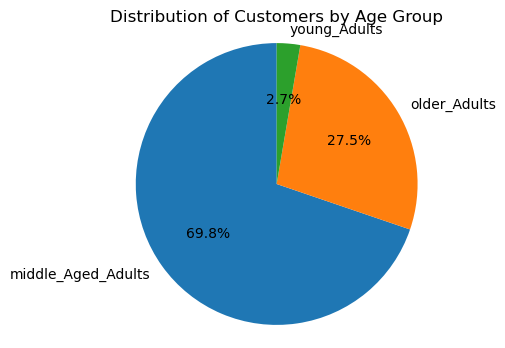

In [106]:
# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(age_counts.values, labels=age_counts.index, autopct='%1.1f%%', 
        startangle=90)
# ,shadow=True)
plt.title('Distribution of Customers by Age Group', fontsize=12)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

In [107]:
###########################################################################################################################################

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Cust_ID                    2233 non-null   int64         
 1   Cust_Education             2233 non-null   category      
 2   Cust_Income                2233 non-null   float64       
 3   Enrollment_Date            2233 non-null   datetime64[ns]
 4   Days_Since_Last_Purchase   2233 non-null   int64         
 5   2Y_Amount_Wines            2233 non-null   int64         
 6   2Y_Amount_Fruits           2233 non-null   int64         
 7   2Y_Amount_Meat             2233 non-null   int64         
 8   2Y_Amount_Fish             2233 non-null   int64         
 9   2Y_Amount_Sweet            2233 non-null   int64         
 10  2Y_Amount_Gold             2233 non-null   int64         
 11  N_Discount_Purchase        2233 non-null   int64         
 12  N_Web_

In [109]:
# Chennels RATIO
# 1.1. web / total_Spending
df['catalog_total_Purchase_%'] = (
    df['N_Catalogue_Purchase'].fillna(0) / df['total_Cust_Purchases'].replace(0, np.nan) * 100
).round(2).fillna(0)
# 1.2. store / total_Spending
df['web_total_Purchase_%'] = (
    df['N_Web_Purchase'].fillna(0) / df['total_Cust_Purchases'].replace(0, np.nan) * 100
).round(2).fillna(0)
# 1.3. catalog / total_Spending
df['store_total_Purchase_%'] = (
    df['N_Store_Purchase'].fillna(0) / df['total_Cust_Purchases'].replace(0, np.nan) * 100
).round(2).fillna(0)


In [110]:
# Grouped Bar Plot
# First, reshape the data from wide to long format
df_melted = df.melt(
    id_vars='cust_Age_binned',
    value_vars=['catalog_total_Purchase_%', 'web_total_Purchase_%', 'store_total_Purchase_%'],
    var_name='Channel',
    value_name='Purchase_%'
)

In [111]:
df_melted

,cust_Age_binned,Channel,Purchase_%
0,middle_Aged_Adults,catalog_total_Purchase_%,28.57
1,middle_Aged_Adults,catalog_total_Purchase_%,17.65
2,older_Adults,catalog_total_Purchase_%,20.00
3,middle_Aged_Adults,catalog_total_Purchase_%,0.00
4,middle_Aged_Adults,catalog_total_Purchase_%,16.67
...,...,...,...
6694,middle_Aged_Adults,store_total_Purchase_%,61.11
6695,middle_Aged_Adults,store_total_Purchase_%,75.00
6696,middle_Aged_Adults,store_total_Purchase_%,41.67
6697,middle_Aged_Adults,store_total_Purchase_%,52.63


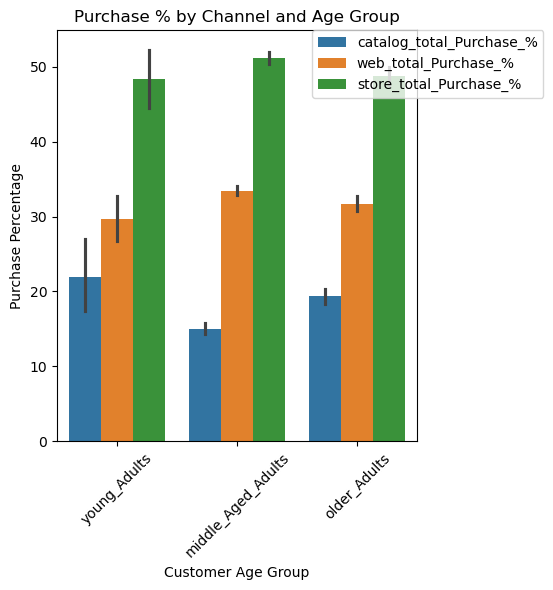

In [112]:
# Create grouped bar plot
plt.figure(figsize=(6, 6))
sns.barplot(data=df_melted, x='cust_Age_binned', y='Purchase_%', hue='Channel')

plt.title("Purchase % by Channel and Age Group")
plt.xlabel("Customer Age Group")
plt.ylabel("Purchase Percentage")
plt.xticks(rotation=45)
plt.legend(title='Channel')
# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', borderaxespad=0.)
df_melted['Channel'] = df_melted['Channel'].str.replace('_total_Purchase_%', '').str.title()
plt.tight_layout()

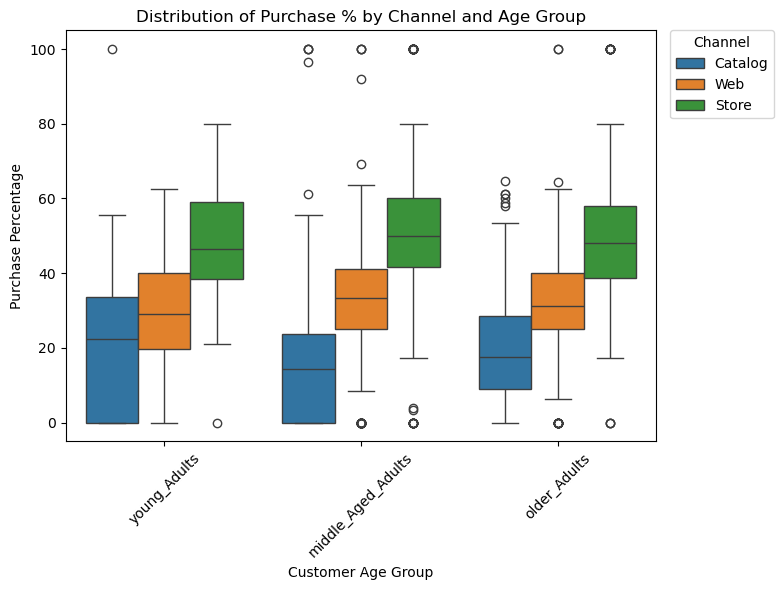

In [113]:
# Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_melted, x='cust_Age_binned', y='Purchase_%', hue='Channel')
plt.title("Distribution of Purchase % by Channel and Age Group")
plt.xlabel("Customer Age Group")
plt.ylabel("Purchase Percentage")
plt.xticks(rotation=45)
# Move legend outside the plot
plt.legend(title='Channel', bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0.)
plt.tight_layout()

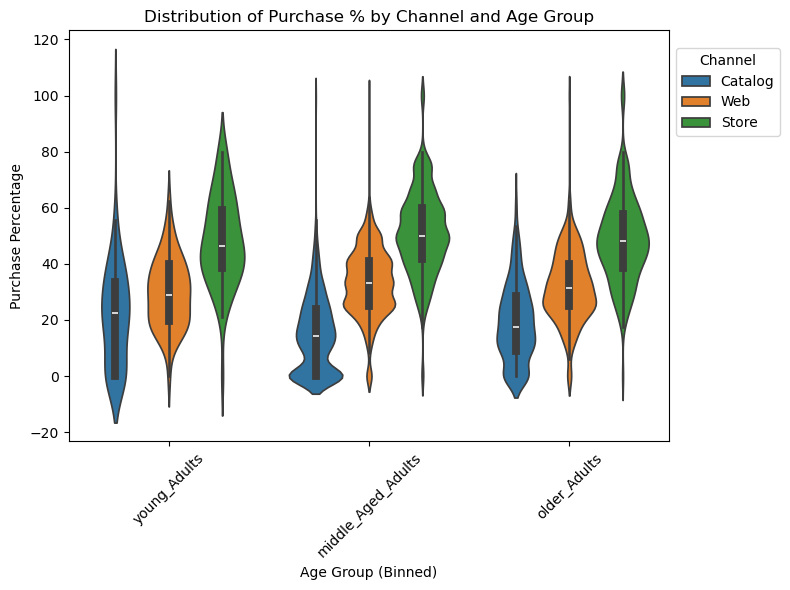

In [114]:
#  Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_melted, x='cust_Age_binned', y='Purchase_%', hue='Channel', inner='box')
plt.title("Distribution of Purchase % by Channel and Age Group")
plt.xlabel("Age Group (Binned)")
plt.ylabel("Purchase Percentage")
plt.xticks(rotation=45)

plt.legend(
    title="Channel",
    bbox_to_anchor=(1, 0.85),  # Position legend to the right
    loc='center left'
)

plt.tight_layout()
plt.show()

In [115]:
###########################################################################################################################################

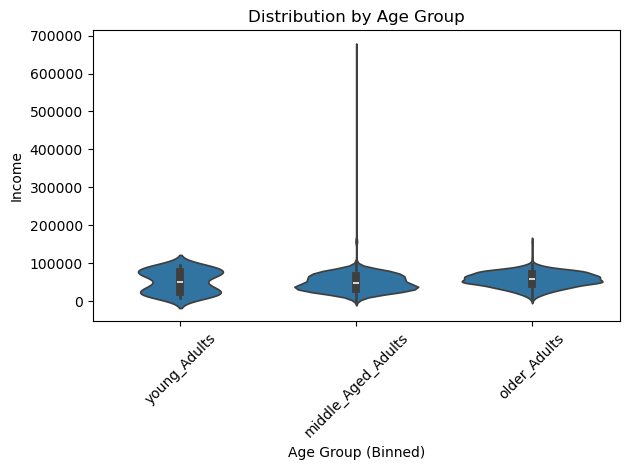

In [116]:
# Visualization Incom vs. Age Group
#  Violin Plot
sns.violinplot(data=df, x='cust_Age_binned', y='Cust_Income', inner='box')
plt.title("Distribution by Age Group")
plt.xlabel("Age Group (Binned)")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.tight_layout()

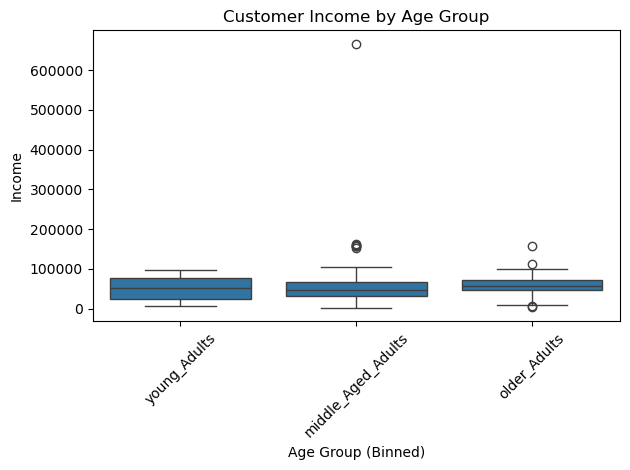

In [117]:
# Boxplot
sns.boxplot(data=df, x='cust_Age_binned', y='Cust_Income')
plt.title("Customer Income by Age Group")
plt.xlabel("Age Group (Binned)")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.tight_layout()

## Income column seems to have an outlier.
    will be deleted

<Axes: xlabel='Cust_Income'>

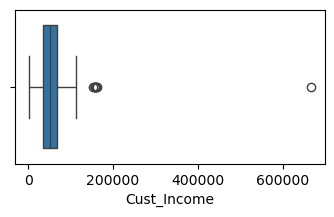

In [118]:
# check the Income values
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, x='Cust_Income')

In [119]:
df[df['Cust_Income'] > 200000].index

Index([524], dtype='int64')

In [120]:
df.drop(index=[524], inplace=True)

<Axes: xlabel='Cust_Income'>

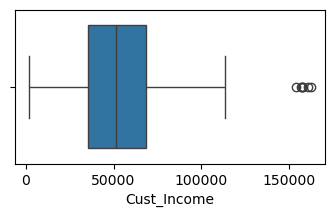

In [121]:
# check the Income values
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, x='Cust_Income')

## Income column still has an outlier.

# Outlier treatment implementaition
##  1 Handling outliers by winsorizing

In [122]:
from scipy.stats.mstats import winsorize
# Winsorizing the 'price' column with limits [0.05, 0.05]
df['Winsorized_Income'] = winsorize(df['Cust_Income'], limits=[0.05, 0.05])

<Axes: xlabel='Winsorized_Income'>

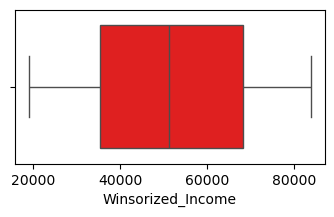

In [123]:
# check the Income values
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, x='Winsorized_Income', color='red')

<Axes: xlabel='Winsorized_Income', ylabel='Density'>

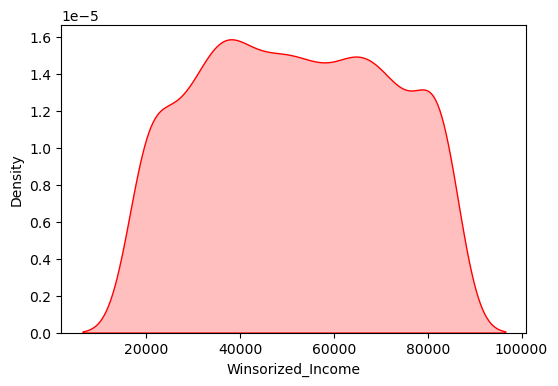

In [124]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x="Winsorized_Income", fill=True, color='red')

##  Upper Bound (UB) / Lover Bound (LB)

In [125]:
def upper_lower_bounds(column):
    q3 = df[column].quantile(0.75)
    q1 = df[column].quantile(0.25)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    df['ublb_' + column] = np.where(
                                    df[column] > upper_limit, # condition: if the value is higher than the upper bound
                                                 upper_limit, # if true, replace with the upper bound
                           np.where( 
                                    df[column] < lower_limit, # is condition is false, check if the value is lower than the lower bound
                                                 lower_limit, # if true, replace with the lower bound
                                    df[column]                # if false, keep the original value
        )
    )
    return upper_limit, lower_limit
    

In [126]:
# Outlier treatment implementaition for 'Cust_Income' 
upper_lower_bounds('Cust_Income')

(117537.25, -13826.75)

<Axes: xlabel='ublb_Cust_Income'>

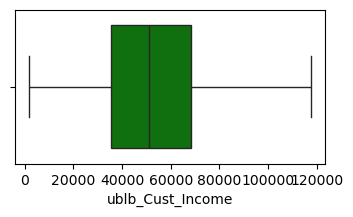

In [127]:
# check the after treatment Income values ('ublb_Cust_Income')
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, x='ublb_Cust_Income', color='green')

<Axes: xlabel='ublb_Cust_Income', ylabel='Density'>

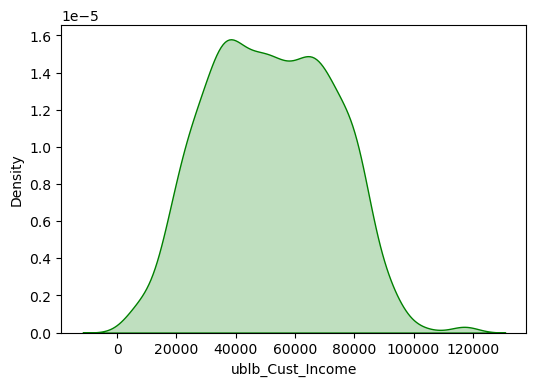

In [128]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x="ublb_Cust_Income", fill=True, color='green')

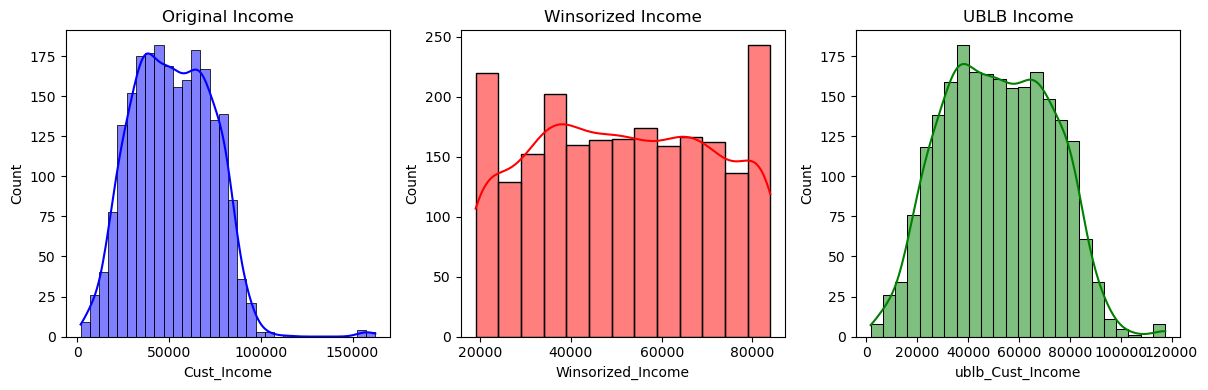

In [129]:
# COMPARE 3 DEFFERENT INCOME COLLUMNS
fig, axis = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(df['Cust_Income'], kde=True, ax=axis[0], color='blue')
axis[0].set_title('Original Income')
axis[0].set_xlabel('Cust_Income')

sns.histplot(df['Winsorized_Income'], kde=True, ax=axis[1], color='red')
axis[1].set_title('Winsorized Income')
axis[1].set_xlabel('Winsorized_Income')

sns.histplot(df['ublb_Cust_Income'], kde=True, ax=axis[2], color='green')
axis[2].set_title('UBLB Income')
axis[2].set_xlabel('ublb_Cust_Income')

plt.tight_layout()

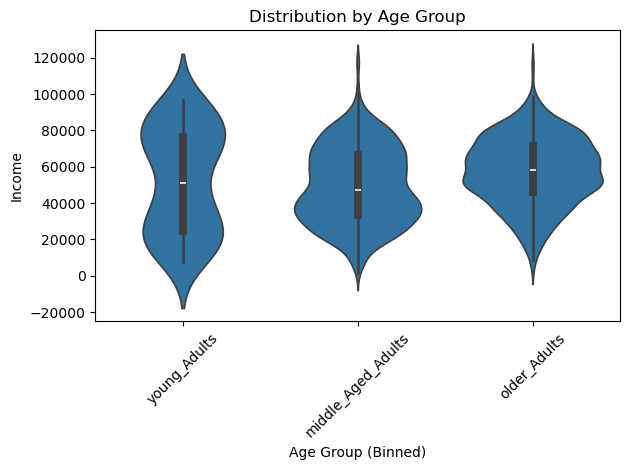

In [130]:
#  Violin Plot
sns.violinplot(data=df, x='cust_Age_binned', y='ublb_Cust_Income', inner='box')
plt.title("Distribution by Age Group")
plt.xlabel("Age Group (Binned)")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.tight_layout()

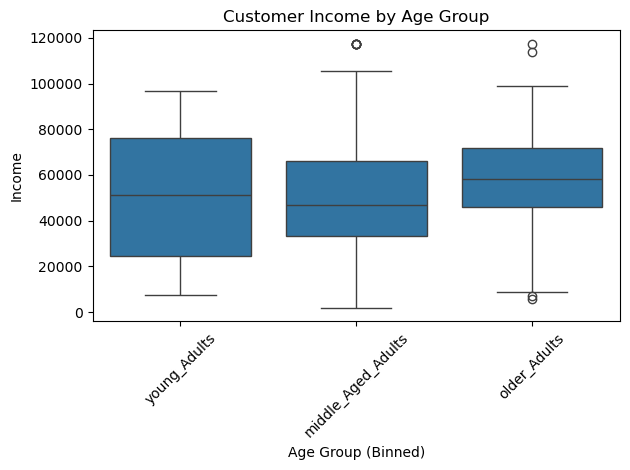

In [131]:
# Boxplot
sns.boxplot(data=df, x='cust_Age_binned', y='ublb_Cust_Income')
plt.title("Customer Income by Age Group")
plt.xlabel("Age Group (Binned)")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.tight_layout()

<Axes: xlabel='total_Cust_Spending'>

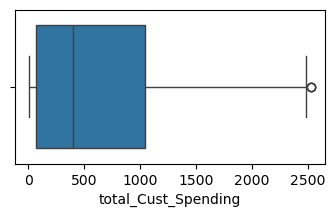

In [132]:
# check the total_Cust_Spending values destribution
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, x='total_Cust_Spending')

In [133]:
df['total_Cust_Spending'].max()

2525

In [134]:
# Outlier treatment implementaition for 'Cust_Income' 
upper_lower_bounds('total_Cust_Spending')

(2507.125, -1393.875)

In [135]:
df['ublb_total_Cust_Spending'].max()

2507.125

<Axes: xlabel='ublb_total_Cust_Spending'>

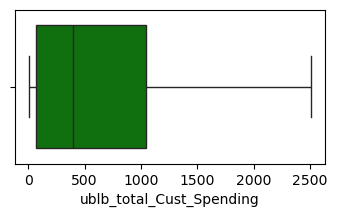

In [136]:
# check the ublb_total_Cust_Spending values
plt.figure(figsize=(4,2))
sns.boxplot(data=df, x='ublb_total_Cust_Spending', color='green')

<Axes: xlabel='ublb_total_Cust_Spending', ylabel='Density'>

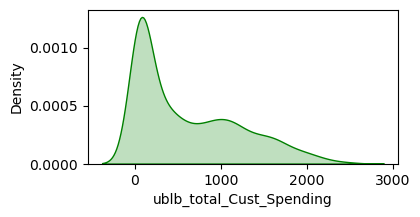

In [137]:
plt.figure(figsize=(4,2))
sns.kdeplot(data=df, x="ublb_total_Cust_Spending", fill=True, color='green')

# <span style='color:blue'> Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.

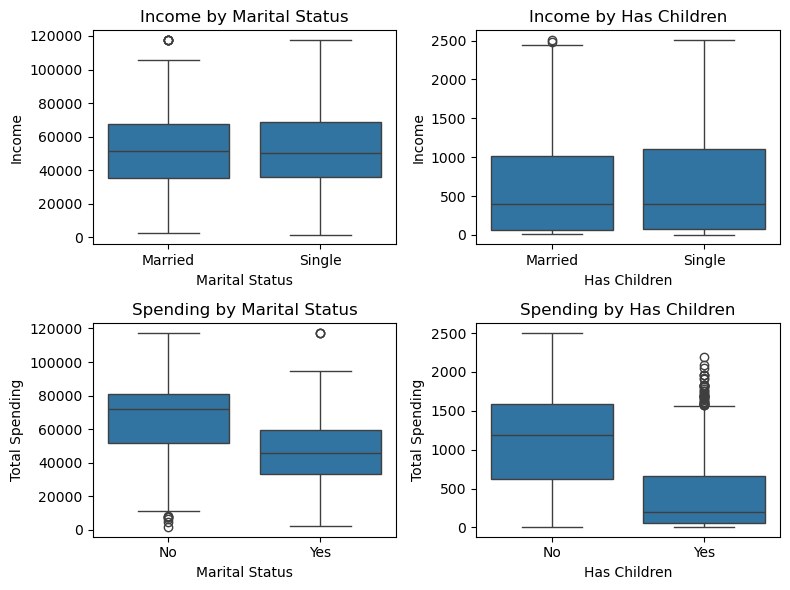

In [138]:
########################################################### NEW ################################## 
fig, axis = plt.subplots(2, 2, figsize=(8, 6), sharey=False)

# Boxplot of Income by Marital Status
sns.boxplot(data=df, x='group_Cust_Mar_Status', y='ublb_Cust_Income', ax=axis[0, 0])
axis[0, 0].set_title("Income by Marital Status")
axis[0, 0].set_xlabel("Marital Status")
axis[0, 0].set_ylabel("Income")

# Boxplot of Total Spending by Marital Status
sns.boxplot(data=df, x='group_Cust_Mar_Status', y='ublb_total_Cust_Spending', ax=axis[0, 1])
axis[1, 0].set_title("Spending by Marital Status")
axis[1, 0].set_xlabel("Marital Status")
axis[1, 0].set_ylabel("Total Spending")

# Boxplot of Income by Has Children
sns.boxplot(data=df, x='cust_Has_Children', y='ublb_Cust_Income', ax=axis[1, 0])
axis[0, 1].set_title("Income by Has Children")
axis[0, 1].set_xlabel("Has Children")
axis[0, 1].set_ylabel("Income")

# Boxplot of Total Spending by Has Children
sns.boxplot(data=df, x='cust_Has_Children', y='ublb_total_Cust_Spending', ax=axis[1, 1])
axis[1, 1].set_title("Spending by Has Children")
axis[1, 1].set_xlabel("Has Children")
axis[1, 1].set_ylabel("Total Spending")

# Adjust layout
plt.tight_layout()
#plt.show()


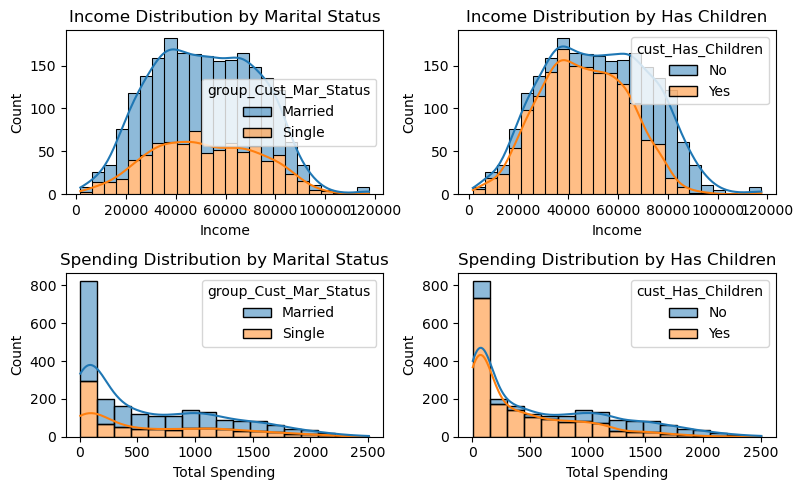

In [139]:
# 2x2 subplot grid
fig, axis = plt.subplots(2, 2, figsize=(8, 5))

# Histogram of Income by Marital Status
sns.histplot(data=df, x='ublb_Cust_Income', hue='group_Cust_Mar_Status', multiple='stack', kde=True, ax=axis[0, 0])
axis[0, 0].set_title("Income Distribution by Marital Status")
axis[0, 0].set_xlabel("Income")
axis[0, 0].set_ylabel("Count")

# Histogram of Income by Has Children
sns.histplot(data=df, x='ublb_Cust_Income', hue='cust_Has_Children', multiple='stack', kde=True, ax=axis[0, 1])
axis[0, 1].set_title("Income Distribution by Has Children")
axis[0, 1].set_xlabel("Income")
axis[0, 1].set_ylabel("Count")

# Histogram of Spending by Marital Status
sns.histplot(data=df, x='ublb_total_Cust_Spending', hue='group_Cust_Mar_Status', multiple='stack', kde=True, ax=axis[1, 0])
axis[1, 0].set_title("Spending Distribution by Marital Status")
axis[1, 0].set_xlabel("Total Spending")
axis[1, 0].set_ylabel("Count")

# Histogram of Spending by Has Children
sns.histplot(data=df, x='ublb_total_Cust_Spending', hue='cust_Has_Children', multiple='stack', kde=True, ax=axis[1, 1])
axis[1, 1].set_title("Spending Distribution by Has Children")
axis[1, 1].set_xlabel("Total Spending")
axis[1, 1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()


In [140]:
# Get the percentages of each Spending Category  by  Age Groups
# 1.1. Culculate the total sum for each Category

In [141]:
spending_by_age_sum = df.groupby('cust_Age_binned', observed=False).agg({
    '2Y_Amount_Wines': ['sum'],
    '2Y_Amount_Fruits': ['sum'],
    '2Y_Amount_Fish': ['sum'],
    '2Y_Amount_Meat': ['sum'],
    '2Y_Amount_Sweet': ['sum'],
    '2Y_Amount_Gold': ['sum'],
    'total_Cust_Spending': ['sum']}
                                                  )
spending_by_age_sum

,2Y_Amount_Wines,2Y_Amount_Fruits,2Y_Amount_Fish,2Y_Amount_Meat,2Y_Amount_Sweet,2Y_Amount_Gold,total_Cust_Spending
,sum,sum,sum,sum,sum,sum,sum
cust_Age_binned,,,,,,,
young_Adults,19848,2258,3033,17627,2100,3363,48229
middle_Aged_Adults,429042,39023,53944,238567,40002,64558,865136
older_Adults,229784,17297,26535,116456,18383,29933,438388


In [142]:
# 1.2. Culculate percentages of each Spending Category
    # 1.2.1. Drop the "total_Cust_Spending" column
spending_without_total = spending_by_age_sum.drop(columns=[('total_Cust_Spending', 'sum')])

    # 1.2.2. Divide each category by the total_Cust_Spending for that row (axis=0). Round to 2 decimal places
percentage_df = (spending_without_total.div(spending_by_age_sum[('total_Cust_Spending', 'sum')], axis=0) * 100).round(2)
percentage_df

,2Y_Amount_Wines,2Y_Amount_Fruits,2Y_Amount_Fish,2Y_Amount_Meat,2Y_Amount_Sweet,2Y_Amount_Gold
,sum,sum,sum,sum,sum,sum
cust_Age_binned,,,,,,
young_Adults,41.15,4.68,6.29,36.55,4.35,6.97
middle_Aged_Adults,49.59,4.51,6.24,27.58,4.62,7.46
older_Adults,52.42,3.95,6.05,26.56,4.19,6.83


In [143]:
# Flatten the column names
percentage_df.columns = percentage_df.columns.droplevel(1)   # drop the 'sum'  names

In [144]:
# Reset index to make "cust_Age_binned" a regular column
percentage_df = percentage_df.reset_index()

In [145]:
percentage_df

,cust_Age_binned,2Y_Amount_Wines,2Y_Amount_Fruits,2Y_Amount_Fish,2Y_Amount_Meat,2Y_Amount_Sweet,2Y_Amount_Gold
0,young_Adults,41.15,4.68,6.29,36.55,4.35,6.97
1,middle_Aged_Adults,49.59,4.51,6.24,27.58,4.62,7.46
2,older_Adults,52.42,3.95,6.05,26.56,4.19,6.83


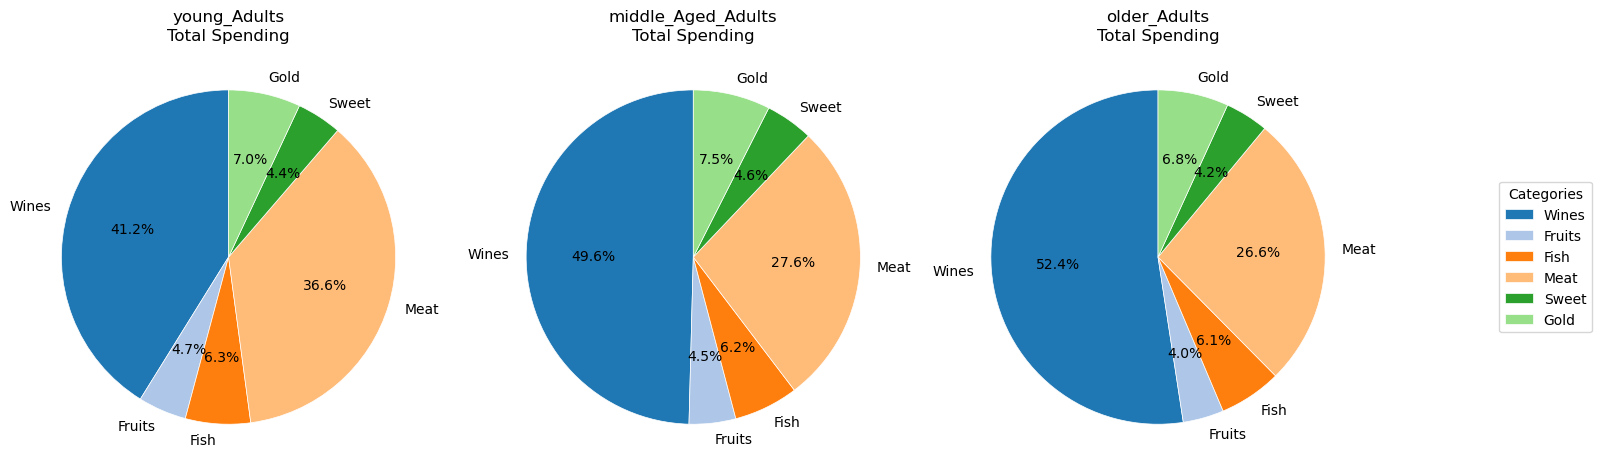

In [146]:
#This visualization helps compare spending priorities across age groups
# Set up the plot with subplots (1 row, 3 columns for 3 age groups)
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

# Define labels for the categories (remove "2Y_Amount_" prefix)
categories = percentage_df.columns[1:]  # Exclude "cust_Age_binned"
labels = [col.replace("2Y_Amount_", "") for col in categories]

# Define colors for consistency across all pie charts
colors = plt.cm.tab20.colors[:len(categories)]

# Plot a pie chart for each age group
for idx, age_group in enumerate(percentage_df['cust_Age_binned']):
    # Extract percentages for the current age group
    percentages = percentage_df.iloc[idx, 1:].values
    
    # Plot pie chart
    axes[idx].pie(
        percentages,
        labels=labels,
        autopct='%1.1f%%',  # Show percentages with 1 decimal
        startangle=90,       # Rotate pie to align the largest slice at the top
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}  # Add white edges
    )

    axes[idx].set_title(f"{age_group}\nTotal Spending", fontsize=12)

# Add a legend for categories (outside the plots)
plt.legend(
    labels,
    title="Categories",
    bbox_to_anchor=(1.3, 0.5),  # Position legend to the right
    loc='center left'
)

plt.tight_layout()

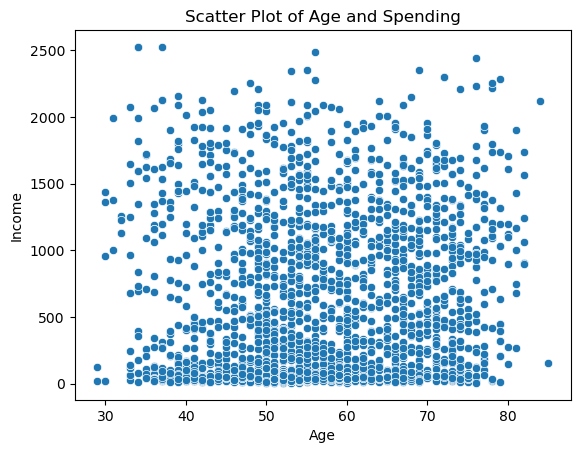

In [147]:
# scatter plot between Customer Age and Customer Spending
sns.scatterplot(x="cust_Age", y="total_Cust_Spending", data=df)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Scatter Plot of Age and Spending");

In [148]:
######################################################################################################
############################    LOYALTY  ##############################################################

In [149]:
import datetime
# Calculate how long Customer is Enroled (days) corrected by 10 yeas ( - 3650)
df['loyal_Customer_days'] = (datetime.datetime.now() - df['Enrollment_Date']).dt.days - 3650

In [150]:
df['Enrollment_Date'].min()

Timestamp('2012-07-30 00:00:00')

In [151]:
df['Enrollment_Date'].max()

Timestamp('2014-06-29 00:00:00')

In [152]:
df['Days_Since_Last_Purchase'].describe()

count    2232.000000
mean       49.154122
std        28.949677
min         0.000000
25%        24.000000
50%        49.500000
75%        74.000000
max        99.000000
Name: Days_Since_Last_Purchase, dtype: float64

In [153]:
# In column 'Days_Since_Last_Purchase' replace 0 with 1
df['Days_Since_Last_Purchase'] = df['Days_Since_Last_Purchase'].mask(df['Days_Since_Last_Purchase'] == 0, 1)

In [154]:
# Days From Last Purchase  /  Total Days Customer Endoled
df_norm_last_purch_enrol_day = pd.DataFrame(((df['Days_Since_Last_Purchase'] / df['loyal_Customer_days']) *100).round(2))

In [155]:
df_norm_last_purch_enrol_day.columns = ['Days_Norm']

In [156]:
df_norm_last_purch_enrol_day.agg(['max', 'median', 'mean', 'min']).round(2)

,Days_Norm
max,25.78
median,6.80
mean,7.24
min,0.10


<Axes: xlabel='Days_Norm', ylabel='Density'>

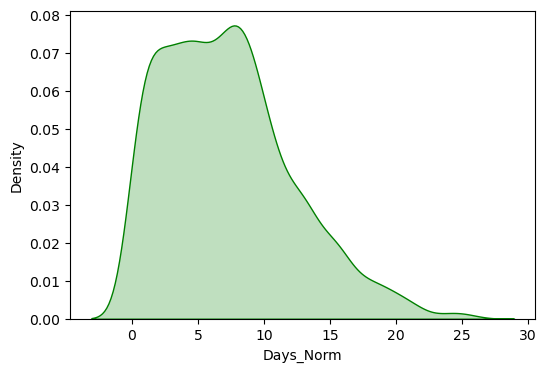

In [157]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df_norm_last_purch_enrol_day, x="Days_Norm", fill=True, color='green')

#### On average, Enroled Customer returns once every 8 days

In [158]:
df[['loyal_Customer_days', 'Days_Since_Last_Purchase']]

,loyal_Customer_days,Days_Since_Last_Purchase
0,395,1
1,396,1
2,429,1
3,431,1
4,464,1
...,...,...
2228,861,99
2229,905,99
2230,955,99
2231,959,99


Text(0.5, 1.0, 'Correlation Heatmap')

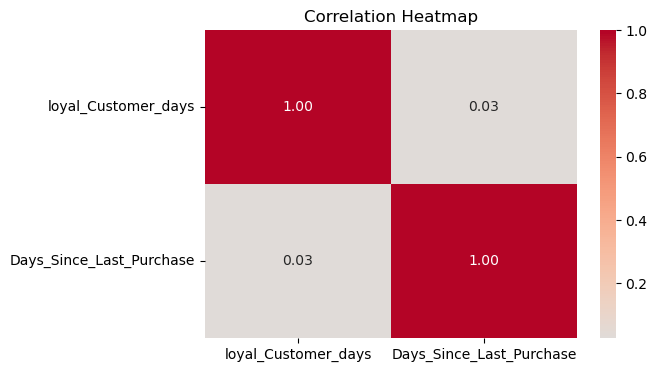

In [159]:
# Check the correlation between Total days customer Enrold   and   Days_Since_Last_Purchase
cols_1 = ['loyal_Customer_days', 'Days_Since_Last_Purchase']
# Compute the correlation matrix
corr_matrix = df[cols_1].corr()

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap")

# Conclision:  No correlation

Text(0.5, 1.0, 'Correlation Heatmap')

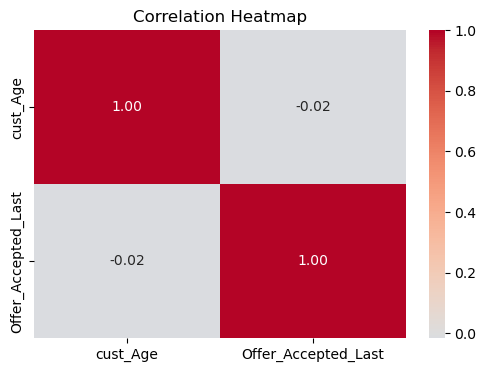

In [160]:
# Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.
cols_2 = ['cust_Age', 'Offer_Accepted_Last']
# Compute the correlation matrix
corr_matrix = df[cols_2].corr()

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap")

# Conclision:  No correlation

In [161]:
##################################################################################################################################

# <span style='color:blue'> Apply ordinal and one-hot encoding based on the various types of categorical variables.

In [162]:
df = df.set_index('Cust_ID')

In [163]:
df.drop('Winsorized_Income', axis=1, inplace=True)

In [164]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Cust_Income,2232.0,51931.342294,1730.0,35434.75,51171.5,68275.75,162397.0,21422.835962
Enrollment_Date,2232,2013-07-10 11:21:17.419354880,2012-07-30 00:00:00,2013-01-16 18:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Days_Since_Last_Purchase,2232.0,49.166667,1.0,24.0,49.5,74.0,99.0,28.928574
2Y_Amount_Wines,2232.0,304.065412,0.0,24.0,173.0,505.0,1493.0,336.871724
2Y_Amount_Fruits,2232.0,26.244624,0.0,1.0,8.0,33.0,199.0,39.711783
2Y_Amount_Meat,2232.0,166.957885,0.0,16.0,67.0,232.0,1725.0,225.7529
2Y_Amount_Fish,2232.0,37.415771,0.0,3.0,12.0,50.0,259.0,54.456115
2Y_Amount_Sweet,2232.0,27.099014,0.0,1.0,8.0,33.0,263.0,41.320001
2Y_Amount_Gold,2232.0,43.841398,0.0,9.0,24.0,56.0,362.0,51.872745
N_Discount_Purchase,2232.0,2.323925,0.0,1.0,2.0,3.0,15.0,1.932849


## Optimize Numeric Data Types

In [165]:
for col in df.columns:
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('int16')
    elif df[col].dtype == 'float64':
        df[col] = df[col].astype('float32')

In [166]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 1826 to 4070
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Cust_Education             2232 non-null   category      
 1   Cust_Income                2232 non-null   float32       
 2   Enrollment_Date            2232 non-null   datetime64[ns]
 3   Days_Since_Last_Purchase   2232 non-null   int16         
 4   2Y_Amount_Wines            2232 non-null   int16         
 5   2Y_Amount_Fruits           2232 non-null   int16         
 6   2Y_Amount_Meat             2232 non-null   int16         
 7   2Y_Amount_Fish             2232 non-null   int16         
 8   2Y_Amount_Sweet            2232 non-null   int16         
 9   2Y_Amount_Gold             2232 non-null   int16         
 10  N_Discount_Purchase        2232 non-null   int16         
 11  N_Web_Purchase             2232 non-null   int16         
 12  N_Catalo

In [168]:
#################################################################
# Use pd.get_dummies to create dummy variables

def dummies_fun(df, col_name):
    dummies_df = pd.get_dummies(df[col_name], prefix='hot', drop_first=True).astype('int8')
    return dummies_df
#################################################################

#  dummies_df  will be concat later
# df = pd.concat([df, dummies_df], axis=1)


In [169]:
df.select_dtypes(include=['object', 'category']).columns

Index(['Cust_Education', 'Cust_Location', 'group_Cust_Mar_Status',
       'cust_Has_Children', 'cust_Age_binned'],
      dtype='object')

### LOCATION

In [170]:
df['Cust_Location'].value_counts()

Cust_Location
SP     1094
SA      335
CA      266
AUS     159
IND     146
GER     120
US      109
ME        3
Name: count, dtype: int64

In [171]:
# Can be converted to the category
df['Cust_Location'] = df['Cust_Location'].astype('category')

In [172]:
#  One-Hot encoding 
df_dumm_Location = dummies_fun(df, 'Cust_Location')

In [173]:
df_dumm_Location

,hot_CA,hot_GER,hot_IND,hot_ME,hot_SA,hot_SP,hot_US
Cust_ID,,,,,,,
1826,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
10476,0,0,0,0,0,0,1
1386,0,0,0,0,0,0,0
5371,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
10142,0,0,0,0,0,0,1
5263,0,0,0,0,0,1,0
22,0,0,0,0,0,1,0


### EDUCATION

In [174]:
df['Cust_Education'].value_counts()

Cust_Education
Graduation    1125
PhD            483
Master         369
Associate      201
Basic           54
Name: count, dtype: int64

In [175]:
# 1. Encode Labels: Convert the categorical data ('Cust_Education') into ordered numerical data using label encoding
df['LE_Education'] = df['Cust_Education'].cat.codes.astype('int8')
df['LE_Education'].value_counts()

LE_Education
2    1125
4     483
3     369
1     201
0      54
Name: count, dtype: int64

In [176]:
df['LE_Education'].value_counts().sort_index()

LE_Education
0      54
1     201
2    1125
3     369
4     483
Name: count, dtype: int64

In [177]:
#  One-Hot encoding 
df_dumm_Education = dummies_fun(df, 'Cust_Education')

In [178]:
df_dumm_Education

,hot_Associate,hot_Graduation,hot_Master,hot_PhD
Cust_ID,,,,
1826,0,1,0,0
1,0,1,0,0
10476,0,1,0,0
1386,0,1,0,0
5371,0,1,0,0
...,...,...,...,...
10142,0,0,0,1
5263,1,0,0,0
22,0,1,0,0


### HAS CHILDREN

In [179]:
df['cust_Has_Children'].value_counts()

cust_Has_Children
Yes    1597
No      635
Name: count, dtype: int64

In [180]:
# Can be converted to 1 / 0
df['10_Has_Children'] = df['cust_Has_Children'].map({'Yes': 1, 'No': 0}).astype('int8')  

In [181]:
#  One-Hot encoding 
df_dumm_hasChildren = dummies_fun(df, 'cust_Has_Children')

In [182]:
df_dumm_hasChildren

,hot_Yes
Cust_ID,
1826,0
1,0
10476,1
1386,1
5371,1
...,...
10142,1
5263,1
22,1


### MARITAL STATUS

In [183]:
df['group_Cust_Mar_Status'].value_counts()

group_Cust_Mar_Status
Married    1442
Single      790
Name: count, dtype: int64

In [184]:
# Can be converted to 1 / 0
df['10_Cust_Mar_Status'] = df['group_Cust_Mar_Status'].map({'Married': 1, 'Single': 0}).astype('int8')  

In [185]:
#  One-Hot encoding 
df_dumm_Marital_Status = dummies_fun(df, 'group_Cust_Mar_Status')

In [186]:
df_dumm_Marital_Status

,hot_Single
Cust_ID,
1826,1
1,1
10476,0
1386,0
5371,1
...,...
10142,1
5263,0
22,1


### AGE

In [187]:
df['cust_Age_binned'].value_counts()

cust_Age_binned
middle_Aged_Adults    1557
older_Adults           615
young_Adults            60
Name: count, dtype: int64

In [194]:
# Can be converted to ordered label encoding
# Define the order (youngest to oldest)
age_order = ['young_Adults', 'middle_Aged_Adults', 'older_Adults']

# Convert to ordered Categorical
df['cust_Age_binned'] = pd.Categorical(df['cust_Age_binned'], categories=age_order, ordered=True)

df['cust_Age_binned']

Cust_ID
1826     middle_Aged_Adults
1        middle_Aged_Adults
10476          older_Adults
1386     middle_Aged_Adults
5371     middle_Aged_Adults
                ...        
10142    middle_Aged_Adults
5263     middle_Aged_Adults
22       middle_Aged_Adults
528      middle_Aged_Adults
4070     middle_Aged_Adults
Name: cust_Age_binned, Length: 2232, dtype: category
Categories (3, object): ['young_Adults' < 'middle_Aged_Adults' < 'older_Adults']

In [195]:
# Encode using .cat.codes
df['LE_Age_binned'] = df['cust_Age_binned'].cat.codes.astype('int8')

In [196]:
df['LE_Age_binned'].value_counts()

LE_Age_binned
1    1557
2     615
0      60
Name: count, dtype: int64

In [197]:
#  One-Hot encoding 
df_dumm_Age = dummies_fun(df, 'cust_Age_binned')

In [198]:
df_dumm_Age

,hot_middle_Aged_Adults,hot_older_Adults
Cust_ID,,
1826,1,0
1,1,0
10476,0,1
1386,1,0
5371,1,0
...,...,...
10142,1,0
5263,1,0
22,1,0


In [200]:
# concatenating
display('After concatenating:')
hot_df = pd.concat([df_dumm_Age, df_dumm_Marital_Status, df_dumm_hasChildren, df_dumm_Education, df_dumm_Location],
                  axis = 1)
hot_df

'After concatenating:'

,hot_middle_Aged_Adults,hot_older_Adults,hot_Single,hot_Yes,hot_Associate,hot_Graduation,hot_Master,hot_PhD,hot_CA,hot_GER,hot_IND,hot_ME,hot_SA,hot_SP,hot_US
Cust_ID,,,,,,,,,,,,,,,
1826,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
10476,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1386,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
5371,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1
5263,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0
22,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0


In [206]:
df

,Cust_Education,Cust_Income,Enrollment_Date,Days_Since_Last_Purchase,2Y_Amount_Wines,2Y_Amount_Fruits,2Y_Amount_Meat,2Y_Amount_Fish,2Y_Amount_Sweet,2Y_Amount_Gold,...,catalog_total_Purchase_%,web_total_Purchase_%,store_total_Purchase_%,ublb_Cust_Income,ublb_total_Cust_Spending,loyal_Customer_days,LE_Education,10_Has_Children,10_Cust_Mar_Status,LE_Age_binned
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1826,Graduation,84835.0,2014-06-16,1,189,104,379,111,189,218,...,28.570000,28.570000,42.860001,84835.0,1190.0,395,2,0,0,1
1,Graduation,57091.0,2014-06-15,1,464,5,64,7,0,37,...,17.650000,41.180000,41.180000,57091.0,577.0,396,2,0,0,1
10476,Graduation,67267.0,2014-05-13,1,134,11,59,15,2,30,...,20.000000,30.000000,50.000000,67267.0,251.0,429,2,1,1,2
1386,Graduation,32474.0,2014-05-11,1,10,0,1,0,0,0,...,0.000000,33.330002,66.669998,32474.0,11.0,431,2,1,1,1
5371,Graduation,21474.0,2014-04-08,1,6,16,24,11,0,34,...,16.670000,50.000000,33.330002,21474.0,91.0,464,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,PhD,66476.0,2013-03-07,99,372,18,126,47,48,78,...,11.110000,27.780001,61.110001,66476.0,689.0,861,4,1,0,1
5263,Associate,31056.0,2013-01-22,99,5,10,13,3,8,16,...,0.000000,25.000000,75.000000,31056.0,55.0,905,1,1,1,1
22,Graduation,46310.0,2012-12-03,99,185,2,88,15,5,14,...,8.330000,50.000000,41.669998,46310.0,309.0,955,2,1,0,1


## The next specific columns already have a multi-label binary format.
## They will keeped as-is  and  do EDA

In [212]:
# Take columns for analysis
df_offer = df[['Offer_Accepted_1', 'Offer_Accepted_2', 'Offer_Accepted_3', 'Offer_Accepted_4', 'Offer_Accepted_5', 'Offer_Accepted_Last']].copy()
df_offer

,Offer_Accepted_1,Offer_Accepted_2,Offer_Accepted_3,Offer_Accepted_4,Offer_Accepted_5,Offer_Accepted_Last
Cust_ID,,,,,,
1826,0,0,0,0,0,1
1,0,1,0,0,0,1
10476,0,0,0,0,0,0
1386,0,0,0,0,0,0
5371,0,0,1,0,0,1
...,...,...,...,...,...,...
10142,0,0,0,0,0,0
5263,0,0,0,0,0,0
22,0,0,0,0,0,0


In [202]:
# How many customers accepted each Offer   (calculated by the value of each row in the single column)
print(df_offer.sum(axis=0))

Offer_Accepted_1       143
Offer_Accepted_2        30
Offer_Accepted_3       163
Offer_Accepted_4       167
Offer_Accepted_5       161
Offer_Accepted_Last    332
dtype: int64


In [209]:
# Customers accepted at list 1 Offer. (calculated by the value of each column in the single row)
columns_to_sum = ['Offer_Accepted_1', 'Offer_Accepted_2', 'Offer_Accepted_3', 'Offer_Accepted_4', 'Offer_Accepted_5', 'Offer_Accepted_Last']
df_offer['Total_Offers_Accepted'] = df_offer[columns_to_sum].sum(axis=1)
df_offer[df_offer['Total_Offers_Accepted'] > 0].shape[0]

606

In [210]:
# Count how many customers accepted exactly 1, 2, 3... offers
df_offer['Total_Offers_Accepted'].value_counts().sort_index()

Total_Offers_Accepted
0    1626
1     368
2     142
3      50
4      36
5      10
Name: count, dtype: int64

In [ ]:
# Calculate percentage distribution
distribution = df_offer['Total_Offers_Accepted'].value_counts(normalize=True).sort_index() * 100

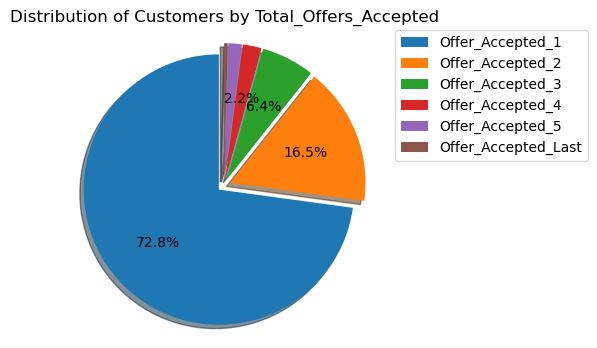

In [224]:
def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct > 2 else ''


# Create a pie chart
plt.figure(figsize=(4, 4))
explode = [0.05] * len(distribution.values) 
plt.pie(distribution.values, 
        autopct=autopct_format, 
        startangle=90,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 10}
       )


plt.title('Distribution of Customers by Total_Offers_Accepted', fontsize=12)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
# Add legend
plt.legend(labels=df_offer.columns, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


#### Customers accepted no one Offer  ->  1626
#### Customers accepted only one compaig offer -> 368
#### Customers accepted two compaigs offer -> 142
#### Customers accepted three compaigs offer -> 50
#### Customers accepted four compaigs offer -> 36
#### Customers accepted five compaigs offer -> 10

    Offer_Accepted_1       143
    Offer_Accepted_2        30
    Offer_Accepted_3       163
    Offer_Accepted_4       167
    Offer_Accepted_5       161
    Offer_Accepted_Last    332
    Total_Amount           996

# Conclusion:
### The number of clients who accepted the next (2nd, 3rd, ....) offers is decreasing More than 2/3 (72.8%) did not accept any offers at all
### At the same time, the number of clients who have accepted offers in promotions has been steadily and recently growing. The company pays attention to this.

# <span style='color:blue'>Generate a heatmap to illustrate the correlation between different pairs of variables.

In [225]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

In [226]:
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_Income,2232.0,51931.339844,21422.843750,1730.0,35434.75,51171.500000,68275.75,162397.000
Days_Since_Last_Purchase,2232.0,49.166667,28.928574,1.0,24.00,49.500000,74.00,99.000
2Y_Amount_Wines,2232.0,304.065412,336.871724,0.0,24.00,173.000000,505.00,1493.000
2Y_Amount_Fruits,2232.0,26.244624,39.711783,0.0,1.00,8.000000,33.00,199.000
2Y_Amount_Meat,2232.0,166.957885,225.752900,0.0,16.00,67.000000,232.00,1725.000
2Y_Amount_Fish,2232.0,37.415771,54.456115,0.0,3.00,12.000000,50.00,259.000
2Y_Amount_Sweet,2232.0,27.099014,41.320001,0.0,1.00,8.000000,33.00,263.000
2Y_Amount_Gold,2232.0,43.841398,51.872745,0.0,9.00,24.000000,56.00,362.000
N_Discount_Purchase,2232.0,2.323925,1.932849,0.0,1.00,2.000000,3.00,15.000
N_Web_Purchase,2232.0,4.085573,2.781015,0.0,2.00,4.000000,6.00,27.000


In [227]:
# Then filter out columns that have only 0 and 1 values
filtered_numeric_df = numeric_df.loc[:, ~numeric_df.apply(lambda col: set(col.unique()).issubset({0, 1}))]

In [228]:
filtered_numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_Income,2232.0,51931.339844,21422.843750,1730.0,35434.75,51171.500000,68275.75,162397.000
Days_Since_Last_Purchase,2232.0,49.166667,28.928574,1.0,24.00,49.500000,74.00,99.000
2Y_Amount_Wines,2232.0,304.065412,336.871724,0.0,24.00,173.000000,505.00,1493.000
2Y_Amount_Fruits,2232.0,26.244624,39.711783,0.0,1.00,8.000000,33.00,199.000
2Y_Amount_Meat,2232.0,166.957885,225.752900,0.0,16.00,67.000000,232.00,1725.000
2Y_Amount_Fish,2232.0,37.415771,54.456115,0.0,3.00,12.000000,50.00,259.000
2Y_Amount_Sweet,2232.0,27.099014,41.320001,0.0,1.00,8.000000,33.00,263.000
2Y_Amount_Gold,2232.0,43.841398,51.872745,0.0,9.00,24.000000,56.00,362.000
N_Discount_Purchase,2232.0,2.323925,1.932849,0.0,1.00,2.000000,3.00,15.000
N_Web_Purchase,2232.0,4.085573,2.781015,0.0,2.00,4.000000,6.00,27.000


In [229]:
# Drop same columns
filtered_numeric_df = filtered_numeric_df.drop(['catalog_total_Purchase_%', 'web_total_Purchase_%', 'store_total_Purchase_%', 'Cust_Income', 'total_Cust_Spending', 'cust_Age'], axis=1)

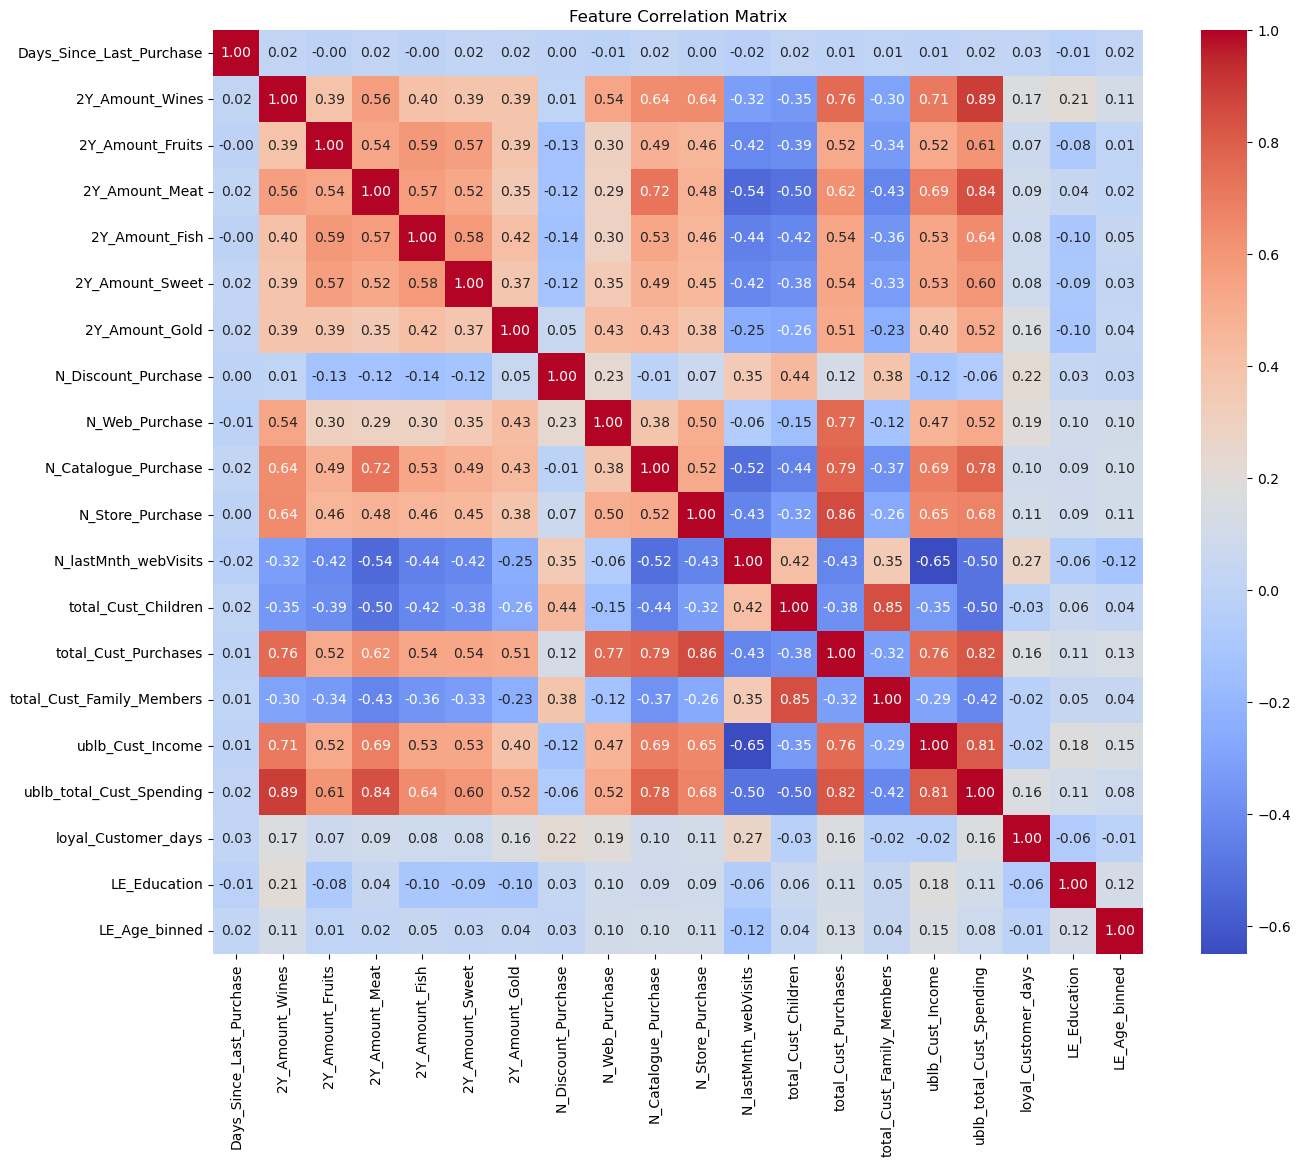

In [230]:
# Correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(filtered_numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [231]:
############################################################################################
def correlation_func(df, threshold):
# Compute correlation matrix
    corr_matrix = df.corr().abs()  # use abs() to consider both positive & negative correlations

# Mask the diagonal and lower triangle (self-correlations and duplicates)
    mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Apply the mask
    upper_triangle = corr_matrix.where(mask)

# Set your threshold
    #threshold = 0.7

# Count how many correlations are above the threshold
    high_corr_pairs = (upper_triangle > threshold).sum().sum()

    print(f"Number of feature pairs with correlation |abs| > {threshold}: {high_corr_pairs}")
############################################################################################
correlation_func(filtered_numeric_df, 0.51)

Number of feature pairs with correlation |abs| > 0.51: 45


### <span style="color: red"> Conclusion: significant correlations were found.


In [2236]:
###############################################################################################################

# <span style='color:blue'> Test the following hypotheses:
    a. Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.
    b. Customers with children likely experience time constraints, making online shopping a more convenient option.
    c. Sales at physical stores may face the risk of cannibalization by alternative distribution channels.
    d. Does the United States significantly outperform the rest of the world in total purchase volumes?

In [232]:
import scipy.stats as stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [233]:
def p_conclusion_print(p):
    alfa = 0.05
    if p <= alfa:
        print(f"\n P-value {p} is less than 0.05.\n\t Reject Ho")
    else:
        print(f"\n P-value {p} is more than 0.05.\n\t Fail to reject Ho")


# Function to calculate Z-scores
def calculate_z_scores(data):
    mean = np.mean(data)
    std = np.std(data, ddof=0)  # Using ddof=1 for sample standard deviation
    z_scores = (data - mean) / std
    #return z_scores

# Z-score distribution analysis
    z_abs = np.abs(z_scores)
    
    # In a perfect normal distribution:
    # ~68% of data should be within 1 std dev (|z| < 1)
    # ~95% within 2 std dev (|z| < 2)
    # ~99.7% within 3 std dev (|z| < 3)
    
    within_1std = np.sum(z_abs < 1) / len(data) * 100
    within_2std = np.sum(z_abs < 2) / len(data) * 100
    within_3std = np.sum(z_abs < 3) / len(data) * 100
    print(f"Z-score Distribution Analysis :\n")
    print(f"Data within ±1 standard deviation: {within_1std:.1f}% (expected ~68.3%)")
    print(f"Data within ±2 standard deviations: {within_2std:.1f}% (expected ~95.4%)")
    print(f"Data within ±3 standard deviations: {within_3std:.1f}% (expected ~99.7%)")


# Check variance equality (Levene's test)
def levene_test(arr_1, arr_2):
    _, levene_p = stats.levene(arr_1, arr_2)
    equal_var = True if levene_p > 0.05 else False
    return equal_var


# Two-sample Z-test

def two_z(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    pop = len(arr)
    return mean, std, pop

def z_stat(mu_1, std_1, n_1, mu_2, std_2, n_2):
    z = (mu_1 - mu_2) / np.sqrt((std_1**2 / n_1) + (std_2**2 / n_2))
    p_value = stats.norm.sf(abs(z)) * 2                                       # Two-tailed
    print(f"\n Z_2 = {z} \t P_2 = {p_value}")
    return z, p_value

    

In [234]:
#####################################################################################################################

# 1. Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.
    
    Compare numbers of web purchases vs. traditional in-store purchases for older_Adalts group
    
### Testing Hypotheses:

    Null Hypothesis H(o):: m_difference (Store - Web) <= 0 (Store purchases are equal to or less than Web purchases)
    Alternative Hypothesis H(a):: m_difference (Store - Web) > 0 (Store purchases are greater than Web purchases)    

In [235]:
# Extract Web purchase for older_Adalts Category
web_purchase = df[df['cust_Age_binned'] == 'older_Adults']['N_Web_Purchase']

In [236]:
web_purchase

Cust_ID
10476     3
7348      4
4073     10
4047      6
9477      6
         ..
9499      3
9940      6
6722     10
7230      4
5675      4
Name: N_Web_Purchase, Length: 615, dtype: int16

In [237]:
# Extract Store purchase for older_Adalts Category
store_purchase = df[df['cust_Age_binned'] == 'older_Adults']['N_Store_Purchase']

In [238]:
store_purchase

Cust_ID
10476    5
7348     5
4073     7
4047     9
9477     9
        ..
9499     7
9940     4
6722     7
7230     7
5675     7
Name: N_Store_Purchase, Length: 615, dtype: int16

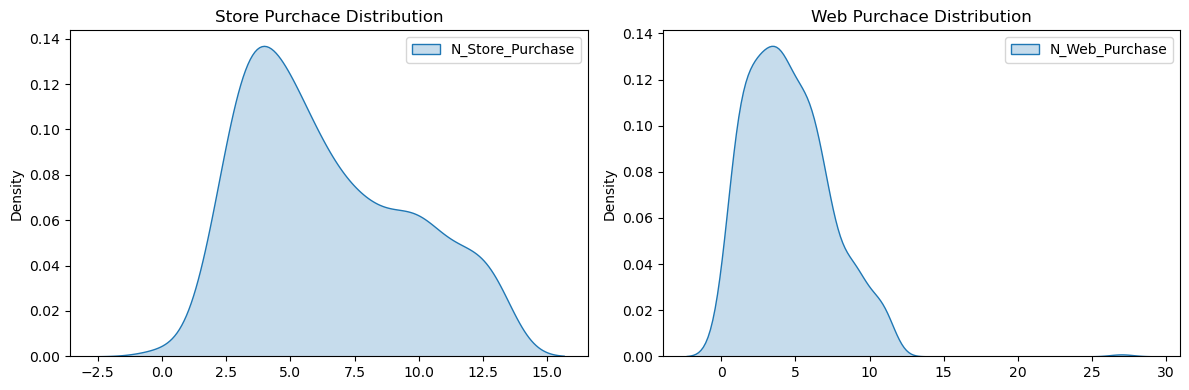

In [239]:
# Check for normaly destributed data
# Visualisation 
store_purchase_df = pd.DataFrame(store_purchase)
web_purchase_df = pd.DataFrame(web_purchase)
fig, axis = plt.subplots(1, 2, figsize=(12, 4))

sns.kdeplot(data=store_purchase_df, fill=True, ax=axis[0])
axis[0].set_title('Store Purchace Distribution')

sns.kdeplot(data=web_purchase_df, fill=True, ax=axis[1])
axis[1].set_title('Web Purchace Distribution')

plt.tight_layout()

<Axes: >

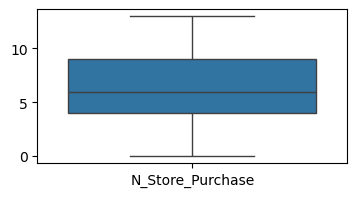

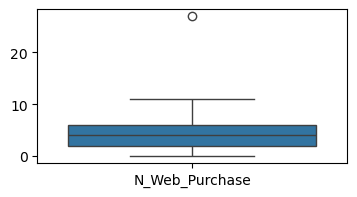

In [240]:
# check for outlier
plt.figure(figsize=(4, 2))
sns.boxplot(data=store_purchase_df)
plt.figure(figsize=(4, 2))
sns.boxplot(data=web_purchase_df)

In [241]:
# There is an outlier
web_purchase_df.max()

N_Web_Purchase    27
dtype: int16

In [242]:
# Select rows with 27
web_purchase_df.loc[web_purchase_df['N_Web_Purchase'] == 27]

,N_Web_Purchase
Cust_ID,
4619,27


In [243]:
web_purchase.tolist().index(27)

65

In [244]:
# drop the outlier
web_purchase_df = web_purchase_df.drop(4619)
web_purchase = web_purchase.drop(web_purchase.index[65])
store_purchase_df = store_purchase_df.drop(4619)
store_purchase = store_purchase.drop(store_purchase.index[65])

<Axes: >

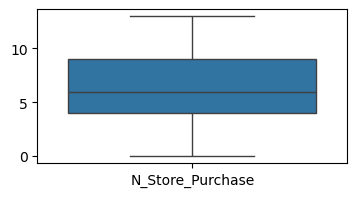

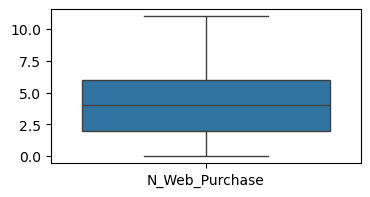

In [245]:
# # check for outlier Outlier dropped
plt.figure(figsize=(4, 2))
sns.boxplot(data=store_purchase_df)
plt.figure(figsize=(4, 2))
sns.boxplot(data=web_purchase_df)

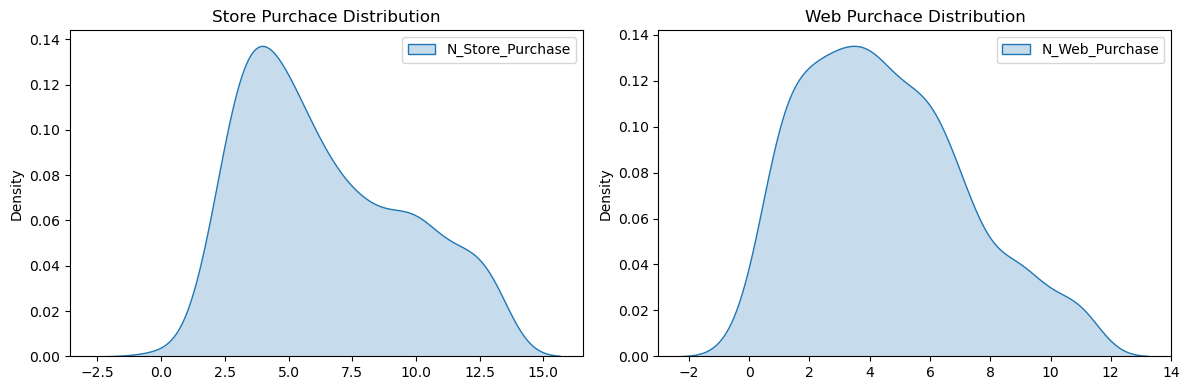

In [246]:
# Check for normaly destributed data   Outlier dropped
# Visualisation  
fig, axis = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(data=store_purchase_df, fill=True, ax=axis[0])
axis[0].set_title('Store Purchace Distribution')
sns.kdeplot(data=web_purchase_df, fill=True, ax=axis[1])
axis[1].set_title('Web Purchace Distribution')
plt.tight_layout()

In [247]:
# Check for normaly destributed data
# 68-95-99 Analysis
print("Web-Purchases")
calculate_z_scores(web_purchase)

Web-Purchases
Z-score Distribution Analysis :

Data within ±1 standard deviation: 71.8% (expected ~68.3%)
Data within ±2 standard deviations: 94.6% (expected ~95.4%)
Data within ±3 standard deviations: 100.0% (expected ~99.7%)


In [248]:
# Check for normaly destributed data
# 68-95-99 Analysis
print("Store-Purchases")
calculate_z_scores(store_purchase)

Store-Purchases
Z-score Distribution Analysis :

Data within ±1 standard deviation: 58.1% (expected ~68.3%)
Data within ±2 standard deviations: 95.0% (expected ~95.4%)
Data within ±3 standard deviations: 100.0% (expected ~99.7%)


### 1. The graphs do not appear to be normally distributed, but Z-csore analysis (68-95-99) and visual inspection indicate a distribution that is close to normal. 
### 2. We have a sample population greater than 30, and we can use the Central Limit Theorem (CLT) to predict that the distribution will be approximately normal.

In [249]:
# Perform paired t-test (one-side test)
t_stat, p_value = stats.ttest_rel(store_purchase, web_purchase, alternative='greater')
p_conclusion_print(p_value)


 P-value 2.5169157561443313e-45 is less than 0.05.
	 Reject Ho


## There is sufficient evidence that older adults spend more in store compared to web purchases

In [250]:
#####################################################################################################################

# 2. Customers with children likely experience time constraints, making online shopping a more convenient option.
## This statement suggests two possible comparisons:
### 1. Comparison Between Customer Groups

    Compare online visits of customers with children vs. customers without children
    This tests if having children influences online visits behavior compared to not having children

### 2. Comparison Between Shopping Channels

    Compare online spending vs. store shopping for customers with children
    This tests if customers with children prefer online shopping over store shopping   


### Testing the 1st Hypotheses
    Null Hypothesis H(o): Customers with children visit online store the same time or less than those without children.

    Alternative Hypothesis H(a): Customers with children visit more offen online than those without.

In [251]:
# Split the data into two groups
yes_children_group = df[df['cust_Has_Children'] == 'Yes']['N_lastMnth_webVisits']
no_children_group = df[df['cust_Has_Children'] == 'No']['N_lastMnth_webVisits']

In [252]:
# One-tailed t-test (children > no children)
t_stat, p_value = stats.ttest_ind(yes_children_group, no_children_group, equal_var=False, alternative='greater')
p_conclusion_print(p_value)


 P-value 1.8133156953636337e-92 is less than 0.05.
	 Reject Ho


## There is significant evidence that customers with children visit the online store more often.

### Testing the 2nd Hypotheses  "Customers with children spend more online than in store"
    Null Hypothesis H(o): Customers with children spend less or the same online than in store

    Alternative Hypothesis H(a): Customers with children spend more online than in store

In [253]:
# Split the data into two groups
children_group_web = df[df['cust_Has_Children'] == 'Yes']['N_Web_Purchase']
children_group_classic = df[df['cust_Has_Children'] == 'Yes']['N_Store_Purchase']

In [254]:
# Calculate differences
spending_diff = children_group_web - children_group_classic

In [255]:
# Formal normality test
_, p = stats.shapiro(spending_diff)
print(f"Shapiro-Wilk Test: p-value={p}")
print("Data is", "normally distributed" if p > 0.05 else "not normally distributed")

Shapiro-Wilk Test: p-value=7.667957675908712e-34
Data is not normally distributed


In [256]:
# If differences are not normally distributed:
# Wilcoxon signed-rank test (one-tailed)
_, p_value = stats.wilcoxon(children_group_web, children_group_classic, alternative='greater')

print(f"Wilcoxon signed-rank test results:")
p_conclusion_print(p_value)

Wilcoxon signed-rank test results:

 P-value 1.0 is more than 0.05.
	 Fail to reject Ho


### Based on the results of the Wilcoxon signed-rank test, we have no evidence to support the alternative hypothesis H(a) (that online spending is higher).
### On the other hand, a one-tailed t-test indicates strong evidence that customers with children visited online stores more often in the past month than customers without children.
### Conclusion: In the future, shoppers with children will likely spend more online than shoppers without children.

In [257]:
#####################################################################################################################

# 3. Does the United States significantly outperform the rest of the world in total purchase volumes?

    Null Hypothesis H(o): US purchase volumes are the same as the rest of the world
    Alternative Hypothesis H(a): US purchase volumes are significantly different from the rest of the world

In [258]:
pop_US = len(df[df['Cust_Location'] == 'US'])
pop_Others = len(df['Cust_Location']) - pop_US
print(f"Population_1 (US) = {pop_US} \nPopulation_2 (Others) = {pop_Others}")

Population_1 (US) = 109 
Population_2 (Others) = 2123


In [259]:
us_purches = df[df['Cust_Location'] == 'US']['total_Cust_Purchases']
others_purches = df[df['Cust_Location'] != 'US']['total_Cust_Purchases']

In [260]:
print("\n US Customers Purches")
calculate_z_scores(us_purches)


 US Customers Purches
Z-score Distribution Analysis :

Data within ±1 standard deviation: 56.0% (expected ~68.3%)
Data within ±2 standard deviations: 97.2% (expected ~95.4%)
Data within ±3 standard deviations: 100.0% (expected ~99.7%)


In [261]:
print("\n Rest of Countries Customers Purches")
calculate_z_scores(others_purches)


 Rest of Countries Customers Purches
Z-score Distribution Analysis :

Data within ±1 standard deviation: 55.3% (expected ~68.3%)
Data within ±2 standard deviations: 98.1% (expected ~95.4%)
Data within ±3 standard deviations: 100.0% (expected ~99.7%)


In [262]:
levene_test(us_purches, others_purches)

True

Text(0.5, 0, 'Purches')

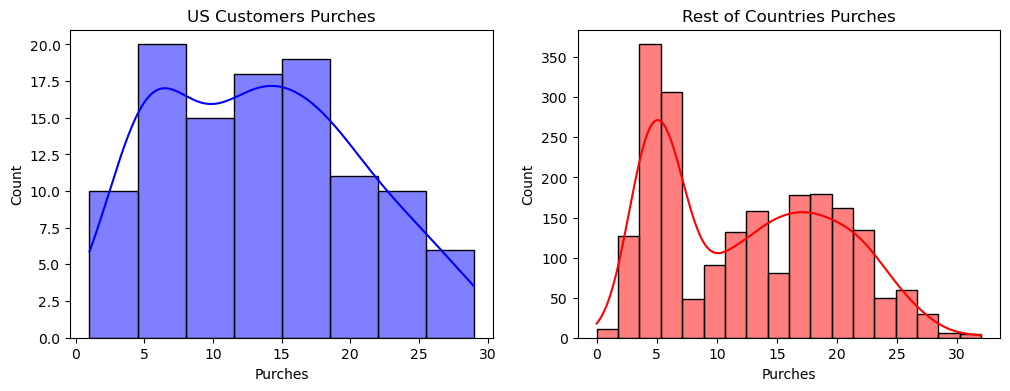

In [263]:
# COMPARE 2 DEFFERENT Plots
fig, axis = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(us_purches, kde=True, ax=axis[0], color='blue')
axis[0].set_title('US Customers Purches')
axis[0].set_xlabel('Purches')

sns.histplot(others_purches, kde=True, ax=axis[1], color='red')
axis[1].set_title('Rest of Countries Purches')
axis[1].set_xlabel('Purches')


### We have two-independent samples, not paired, data is not normaly distriduted with known variance  
### So we are going to use the Mann-Whitney U test to determine if US purchase volumes are significantly different from the rest of the world


In [264]:
u_stat, p_value = stats.mannwhitneyu(us_purches, others_purches, alternative='two-sided')
print(f"Mann-Whitney U test results:")
p_conclusion_print(p_value)

Mann-Whitney U test results:

 P-value 0.14321000521005117 is more than 0.05.
	 Fail to reject Ho


## We do not have enough evidence to say that purchase volumes in the U.S. are significantly different from the rest of the world.

In [265]:
#####################################################################################################################

# 4. Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

    Null Hypothesis H(o): No significant difference between the groups (web, store, catalog); no evidence of cannibalization.

    Alternative Hypothesis H(a): There is a significant difference between at least two groups of the distribution channels.At least one channel (possibly the store) has different sales, suggesting possible cannibalization.

In [268]:
# Combine data 
purchase_numbers = pd.concat([df['N_Web_Purchase'], df['N_Store_Purchase'], df['N_Catalogue_Purchase']], ignore_index=True)
channel = (
    ['Web'] * len(df['N_Web_Purchase']) +
    ['Store'] * len(df['N_Store_Purchase']) +
    ['Catalogue'] * len(df['N_Catalogue_Purchase'])
)

df_anova = pd.DataFrame({
    'purchase_numbers': purchase_numbers,
    'channel': channel
})


# Fit OLS model (C() treats 'channel' as categorical)
model = ols('purchase_numbers ~ C(channel)', data=df_anova).fit()

# Run ANOVA
anova_results = anova_lm(model)

# Print results
print(anova_results)

# Extract p-value
p_value = anova_results.iloc[0, 4]
print(f"\nP-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between at least two groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")


                df        sum_sq      mean_sq           F         PR(>F)
C(channel)     2.0  10994.175926  5497.087963  614.026498  1.455635e-245
Residual    6693.0  59919.254032     8.952526         NaN            NaN

P-value: 1.4556349051338758e-245
Reject the null hypothesis: There is a significant difference between at least two groups.


### There is a statistically significant difference in purchase volumes between at least two of the channels: store, web, or catalogue.
### We can proceed with Tukey's Honest Significant Difference (HSD) test to pinpoint which distribution channels are contributing to that difference.

In [269]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [270]:
# Run Tukey's HSD
tukey_result = pairwise_tukeyhsd(df_anova['purchase_numbers'], df_anova['channel'], alpha=0.05)

# Output the results
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1  group2 meandiff p-adj  lower   upper  reject
------------------------------------------------------
Catalogue  Store   3.1344   0.0  2.9244  3.3444   True
Catalogue    Web   1.4252   0.0  1.2152  1.6351   True
    Store    Web  -1.7092   0.0 -1.9192 -1.4993   True
------------------------------------------------------


### There is a significant difference between all three distribution channels in terms of purchase amounts. 
### This supports hypothesis that sales at physical stores may be cannibalized by alternative channels (Catalogue and Web).

# Use appropriate visualization to help analyze the following:

## a.      Identify the top-performing products and those with the lowest revenue.

In [271]:
# Items customer buying
df_goods = df.filter(like='Amount')

In [272]:
# Sum revenue across all customers for each product
product_revenue = df_goods.sum().sort_values(ascending=False)

# Convert to DataFrame for better display
product_revenue_df = product_revenue.reset_index()
product_revenue_df.columns = ['Product', 'Total_Revenue']
product_revenue_df

,Product,Total_Revenue
0,2Y_Amount_Wines,678674
1,2Y_Amount_Meat,372650
2,2Y_Amount_Gold,97854
3,2Y_Amount_Fish,83512
4,2Y_Amount_Sweet,60485
5,2Y_Amount_Fruits,58578


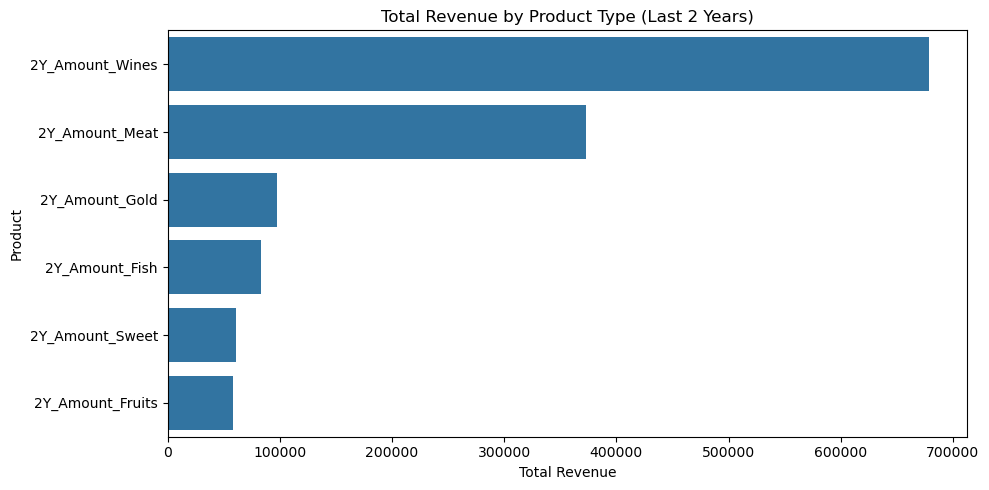

In [273]:
# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x='Total_Revenue', y='Product', data=product_revenue_df)
plt.title('Total Revenue by Product Type (Last 2 Years)')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


# a. Conclusion: 
    Top-performing products: 
                Wine with total revenue 678674
                Meat with total revenue 372650
    Low-performing products: 
                Fruits with total revenue 58578
                Sweet with total revenue 60485

## b.      Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.

Text(0.5, 1.0, 'Correlation Heatmap')

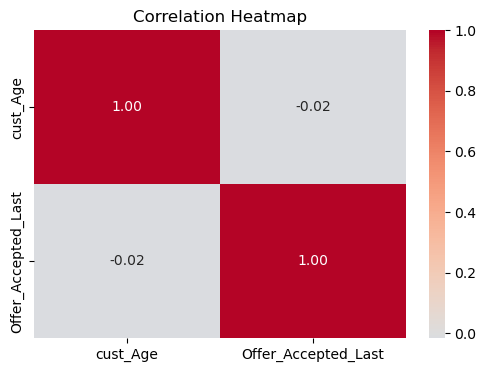

In [274]:
# Check the correlation between customers' age   and   the acceptance rate of the last campaign
cols = ['cust_Age', 'Offer_Accepted_Last']

# Compute the correlation matrix
corr_matrix = df[cols].corr()

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap")


# Conclusion: No correlation

## c. Determine the country with the highest number of customers who accepted the last campaign.

In [275]:
# Filter only accepted offers
accepted_df = df[df['Offer_Accepted_Last'] == 1]

# Count accepted offers by country
country_counts = accepted_df['Cust_Location'].value_counts().reset_index()
country_counts

,Cust_Location,count
0,SP,176
1,SA,52
2,CA,38
3,AUS,22
4,GER,17
5,US,13
6,IND,12
7,ME,2


In [276]:
country_counts.columns = ['Country', 'Accepted_Count']

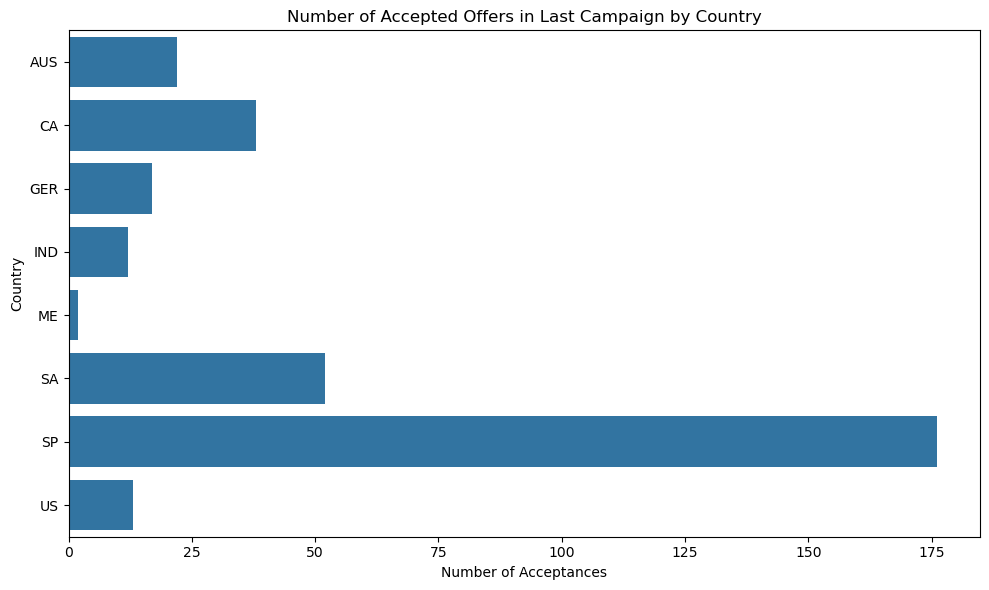

In [277]:
# Sort values for better visualization
country_counts = country_counts.sort_values(by='Accepted_Count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accepted_Count', y='Country', data=country_counts)
plt.title('Number of Accepted Offers in Last Campaign by Country')
plt.xlabel('Number of Acceptances')
plt.ylabel('Country')
plt.tight_layout()

# Conclusion:  Spain is the country with the highest number of customers who accepted the last campaign

# d. Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

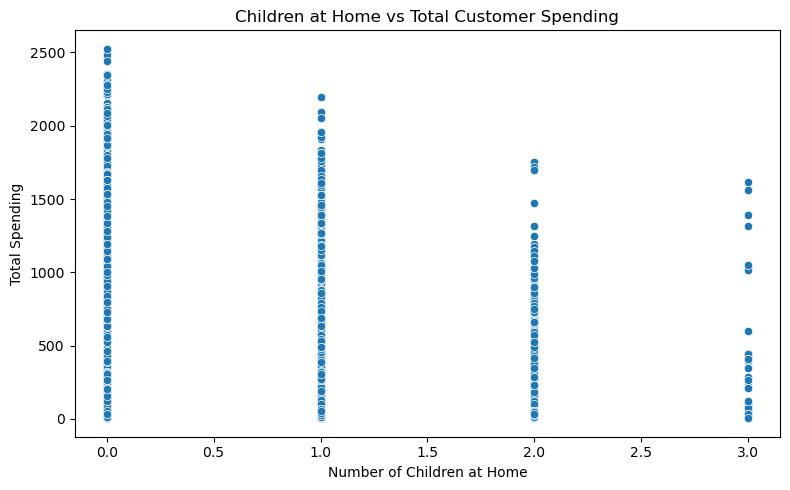

In [278]:
# Scatter Plot: Children vs Spending
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_Cust_Children', y='total_Cust_Spending', data=df)
plt.title("Children at Home vs Total Customer Spending")
plt.xlabel("Number of Children at Home")
plt.ylabel("Total Spending")
plt.tight_layout()

# Conclusion: Less children more spending

# e. Analyze the educational background of customers who lodged complaints in the last two years.

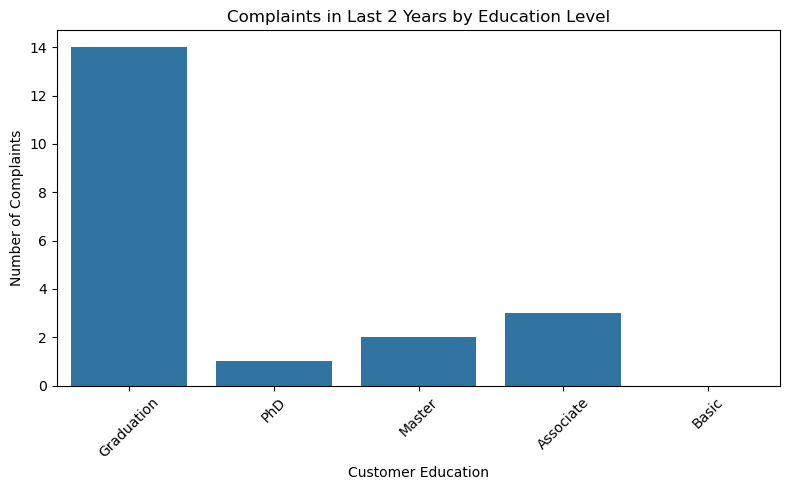

In [279]:
#  Countplot of Complaints by Education
plt.figure(figsize=(8, 5))
sns.countplot(x='Cust_Education', data=df[df['Complain_2Y'] == 1], order=df['Cust_Education'].value_counts().index)
plt.title("Complaints in Last 2 Years by Education Level")
plt.xlabel("Customer Education")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [280]:
# Complaint Rate (%) by Education Level

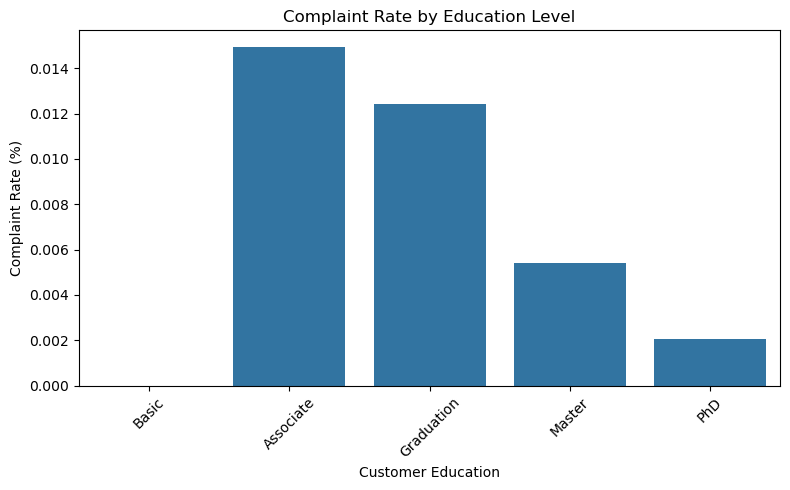

In [281]:
complaint_rate = df.groupby('Cust_Education', observed=True)['Complain_2Y'].mean().reset_index()
complaint_rate.columns = ['Cust_Education', 'Complaint_Rate']

plt.figure(figsize=(8, 5))
sns.barplot(x='Cust_Education', y='Complaint_Rate', data=complaint_rate)
plt.title("Complaint Rate by Education Level")
plt.xlabel("Customer Education")
plt.ylabel("Complaint Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Conclussion: In absolute terms, Graduation group complains more, in percentage terms, Associate

In [282]:
############################################################################################################################################################

# Concatenation

In [283]:
# Final DF
df = pd.concat([df, hot_df], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 1826 to 4070
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Cust_Education             2232 non-null   category      
 1   Cust_Income                2232 non-null   float32       
 2   Enrollment_Date            2232 non-null   datetime64[ns]
 3   Days_Since_Last_Purchase   2232 non-null   int16         
 4   2Y_Amount_Wines            2232 non-null   int16         
 5   2Y_Amount_Fruits           2232 non-null   int16         
 6   2Y_Amount_Meat             2232 non-null   int16         
 7   2Y_Amount_Fish             2232 non-null   int16         
 8   2Y_Amount_Sweet            2232 non-null   int16         
 9   2Y_Amount_Gold             2232 non-null   int16         
 10  N_Discount_Purchase        2232 non-null   int16         
 11  N_Web_Purchase             2232 non-null   int16         
 12  N_Catalo

In [284]:
### Save Updated .csv
df.to_csv("marketing_data_updated.csv", index=False)